In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

In [ ]:
## References for Question 3, Question 4 and Question 5
## https://medium.com/jun-devpblog/cv-6-structure-extraction-with-hough-transform-line-circle-aaf8be62f169
## https://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

In [ ]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt

Upload 'pic1.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [ ]:
img = imageio.imread('pic1.png')       

Please refer lecture slides for hints for applying the algorithm.

Also, for clarity, looking at every variable's values and dimensions is recommended.

In [ ]:
def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:

    img - 2-D binary image
    
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.

    lines_are_white - boolean indicating whether lines to be detected are white

    value_threshold - Pixel values above or below the value_threshold are edges

    Returns:
    
    accumulator - 2D array of the hough transform accumulator
    
    theta - Array of angles used in computation, in radians.
    
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    cos_t = np.cos(thetas)    ## Using numpy function np.cos, calculate cosine values of theta and store in variable cos_t ## 
    sin_t = np.sin(thetas)    ## Using numpy function np.sin, calculate sine values of theta and store in variable sin_t ##
    

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    
    accumulator = np.zeros((2*diag_len, num_thetas), dtype=np.uint8)    ## Using numpy, declare a zero matrix of Hough accumulator array #
                                 # of theta vs rho of size (2*diag_len, num_thetas), keep dtype=np.uint8, name it accumulator ##
    
  
    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    y_idxs_, x_idxs_ = np.where(img == 255 * lines_are_white)    ## In the img matrix, find where are black and white pixels # 
                                 
    x_idxs = []
    y_idxs = []
    for idxs in zip(x_idxs_, y_idxs_):                           # and store the indexes of the white edge pixels in x_idxs and y_idxs ##
      xidx, yidx = idxs
      try:
        if lines_are_white:
          if img[xidx-1, yidx-1] < value_threshold or img[xidx, yidx-1] < value_threshold or img[xidx+1, yidx-1] < value_threshold or img[xidx+1, yidx] < value_threshold or img[xidx+1, yidx+1] < value_threshold or img[xidx, yidx+1] < value_threshold or img[xidx-1, yidx+1] < value_threshold or img[xidx-1, yidx] < value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
        else:
           if img[xidx-1, yidx-1] > value_threshold or img[xidx, yidx-1] > value_threshold or img[xidx+1, yidx-1] > value_threshold or img[xidx+1, yidx] > value_threshold or img[xidx+1, yidx+1] > value_threshold or img[xidx, yidx+1] > value_threshold or img[xidx-1, yidx+1] > value_threshold or img[xidx-1, yidx] > value_threshold:
              x_idxs.append(xidx)
              y_idxs.append(yidx)
      except IndexError as e:
        pass    

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################                       
    
    for idxs in zip(x_idxs, y_idxs):                                     ## Write a for loop inside a for loop to do voting in accumulator; the first one recurses through x_idxs #
      for i in range(num_thetas):                                        # the second one recurses through thetas; in which  #
        xidx, yidx = idxs
        rho = diag_len + int(round(xidx * cos_t[i] + yidx * sin_t[i]))   # for every value of thetas[i], calculate rho value using rho = diag_len + int(round(x * cos_t[i] + y * sin_t[i])) formula #
        accumulator[rho, (num_thetas-1) - i] += 1                        # and increment the accumulator for that specific (rho, theta)
    # The second index is set as (num_thetas-1) - i, as the display function needs theta values from 89 to -90 but the thetas array goes from -90 to 89

    return accumulator, thetas, rhos

In [ ]:
## Do not change anything in this block ##

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


Click on Runtime and select Run all before submitting this file.

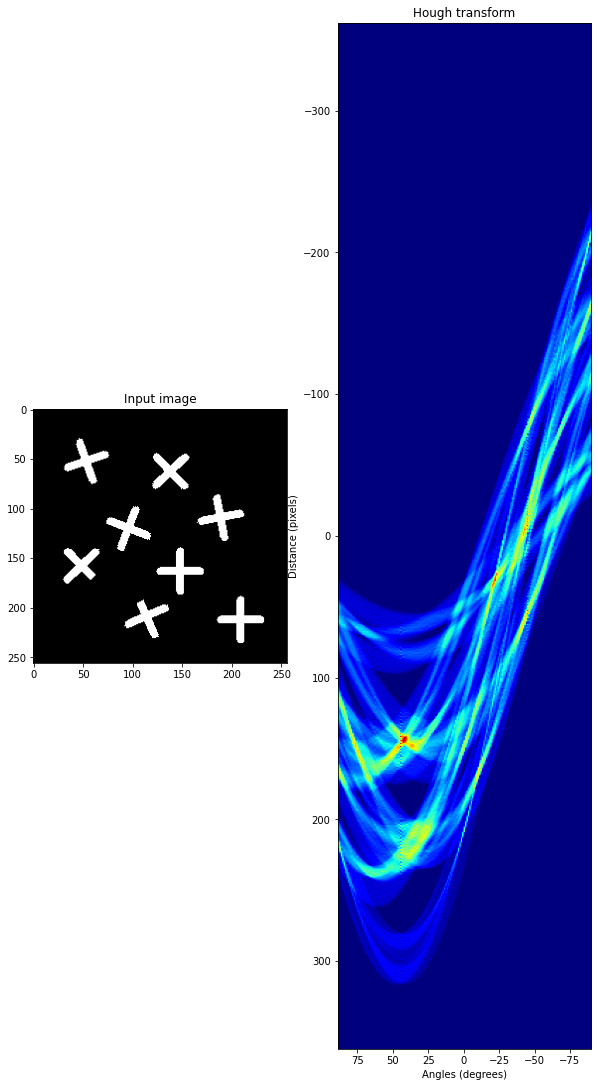

In [ ]:
accumulator, thetas, rhos = line_detect_hough(img)
display_hough(img, accumulator, thetas, rhos)

In [ ]:
## In this block, print the maxima(s) in the accumulator 
## and the rho,theta value(s) for which it occurs.
## You are allowed to use the above functions and modify them inside this block (if required).

# Values printed here correspond to the graph displayed above

accumulator, thetas, rhos = line_detect_hough(img)
diag_len = int(round(math.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2)))
local_maximas = []
for i in range(1, accumulator.shape[0]-1):
  for j in range(1, accumulator.shape[1]-1):
    if accumulator[i, j] > accumulator[i-1, j-1] and accumulator[i, j] > accumulator[i, j-1] and accumulator[i, j] > accumulator[i+1, j-1] and accumulator[i, j] > accumulator[i+1, j] and accumulator[i, j] > accumulator[i+1, j+1] and accumulator[i, j] > accumulator[i, j+1] and accumulator[i, j] > accumulator[i-1, j+1] and accumulator[i, j] > accumulator[i-1, j]:
      local_maximas.append((i-diag_len,j,accumulator[i,j]))

local_maximas.sort(key = lambda x : x[2])

for lcm in local_maximas:
  print("Local Maxima encounterd at: Rho = "+str(lcm[0])+", Theta = "+str(np.round(thetas[(len(thetas)-1) - lcm[1]]*180/np.pi, 2))+" degrees with value = "+str(lcm[2]))


rho_max, theta_max = np.unravel_index(np.argmax(accumulator), accumulator.shape)
rho_max -= diag_len
theta_max = np.round(thetas[(len(thetas)-1) - theta_max]*180/np.pi, 2)
print("\nGlobal Maxima encounterd at: Rho = "+str(rho_max)+", Theta = "+str(theta_max)+" degrees with value = "+str(np.max(accumulator)))

Local Maxima encounterd at: Rho = -49, Theta = -66.0 degrees with value = 3
Local Maxima encounterd at: Rho = 122, Theta = 75.0 degrees with value = 5
Local Maxima encounterd at: Rho = 202, Theta = -6.0 degrees with value = 5
Local Maxima encounterd at: Rho = 204, Theta = -5.0 degrees with value = 5
Local Maxima encounterd at: Rho = 207, Theta = -3.0 degrees with value = 5
Local Maxima encounterd at: Rho = 240, Theta = 14.0 degrees with value = 5
Local Maxima encounterd at: Rho = 243, Theta = 15.0 degrees with value = 5
Local Maxima encounterd at: Rho = 253, Theta = 7.0 degrees with value = 5
Local Maxima encounterd at: Rho = 260, Theta = 9.0 degrees with value = 5
Local Maxima encounterd at: Rho = 268, Theta = 12.0 degrees with value = 5
Local Maxima encounterd at: Rho = 271, Theta = 13.0 degrees with value = 5
Local Maxima encounterd at: Rho = 273, Theta = 14.0 degrees with value = 5
Local Maxima encounterd at: Rho = 283, Theta = 17.0 degrees with value = 5
Local Maxima encounterd at